In [2]:
import pandas as pd

df = pd.read_csv('USD_BRL Dados Históricos.csv')

In [3]:
df.head(15)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.01.2025,"5,8410","5,8735","5,8735","5,8106",NaN,"-0,56%"
1,30.01.2025,"5,8740","5,8706","5,9332","5,8473",NaN,"0,30%"
2,29.01.2025,"5,8563","5,8633","5,8892","5,8420",NaN,"-0,01%"
3,28.01.2025,"5,8571","5,8953","5,9205","5,8557",NaN,"-0,60%"
4,27.01.2025,"5,8926","5,9447","5,9560","5,8926",NaN,"-0,31%"
5,24.01.2025,"5,9109","5,9247","5,9250","5,8674",NaN,"-0,23%"
6,23.01.2025,"5,9243","5,9423","5,9706","5,8733",NaN,"-0,29%"
7,22.01.2025,"5,9415","6,0222","6,0273","5,9155",NaN,"-1,34%"
8,21.01.2025,"6,0220","6,0319","6,0680","6,0168",NaN,"-0,16%"
9,20.01.2025,"6,0315","6,0691","6,0862","6,0268",NaN,"-0,64%"


In [5]:
df['Data'] = df['Data'].str.replace('.', '-', regex=False)  
df['Data'] = pd.to_datetime(df['Data'], format='%d-%m-%Y') 
df['Data'] = df['Data'].dt.strftime('%Y-%m-%d')  

In [6]:
df.head(15)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-01-31,"5,8410","5,8735","5,8735","5,8106",NaN,"-0,56%"
1,2025-01-30,"5,8740","5,8706","5,9332","5,8473",NaN,"0,30%"
2,2025-01-29,"5,8563","5,8633","5,8892","5,8420",NaN,"-0,01%"
3,2025-01-28,"5,8571","5,8953","5,9205","5,8557",NaN,"-0,60%"
4,2025-01-27,"5,8926","5,9447","5,9560","5,8926",NaN,"-0,31%"
5,2025-01-24,"5,9109","5,9247","5,9250","5,8674",NaN,"-0,23%"
6,2025-01-23,"5,9243","5,9423","5,9706","5,8733",NaN,"-0,29%"
7,2025-01-22,"5,9415","6,0222","6,0273","5,9155",NaN,"-1,34%"
8,2025-01-21,"6,0220","6,0319","6,0680","6,0168",NaN,"-0,16%"
9,2025-01-20,"6,0315","6,0691","6,0862","6,0268",NaN,"-0,64%"


In [8]:
df = df.drop(columns=['Vol.'])

In [31]:
df.head(15)

,ds,y
0,2023-01-01,10
1,2023-01-02,12
2,2023-01-03,9
3,2023-01-04,14
4,2023-01-05,13
5,2023-01-06,15
6,2023-01-07,20
7,2023-01-08,22
8,2023-01-09,18
9,2023-01-10,25


In [ ]:
df2 [['ds', 'y']] = df [['Data', 'Último']].copy

In [22]:
data = {
    'ds': pd.date_range(start='2025-01-01', periods=10, freq='D'),  # 10 dias consecutivos
    'y': [8, 11, 17, 19, 22, 6, 25, 16, 9, 13]  # valores fictícios
}

print(f"\n\n Dados: \n\n\t{data} \n\n")

df = pd.DataFrame(data)


print(f"\nDataset \n\n")
df.info()



 Dados: 

	{'ds': DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10'],
              dtype='datetime64[ns]', freq='D'), 'y': [8, 11, 17, 19, 22, 6, 25, 16, 9, 13]} 



Dataset 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      10 non-null     datetime64[ns]
 1   y       10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes


In [24]:
# Carregando a biblioca/modulos
from prophet import Prophet

# Criar uma instância do modelo
model = Prophet()

In [25]:
model.fit(df)

19:33:58 - cmdstanpy - INFO - Chain [1] start processing
19:33:58 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Criar datas futuras (5 dias a mais)
future = model.make_future_dataframe(periods=5)

future.info()

future.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      15 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 248.0 bytes


,ds
10,2025-01-11
11,2025-01-12
12,2025-01-13
13,2025-01-14
14,2025-01-15


In [27]:
# Gerar previsões
forecast = model.predict(future)

forecast.info ()

forecast.head ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          15 non-null     datetime64[ns]
 1   trend                       15 non-null     float64       
 2   yhat_lower                  15 non-null     float64       
 3   yhat_upper                  15 non-null     float64       
 4   trend_lower                 15 non-null     float64       
 5   trend_upper                 15 non-null     float64       
 6   additive_terms              15 non-null     float64       
 7   additive_terms_lower        15 non-null     float64       
 8   additive_terms_upper        15 non-null     float64       
 9   multiplicative_terms        15 non-null     float64       
 10  multiplicative_terms_lower  15 non-null     float64       
 11  multiplicative_terms_upper  15 non-null     float64       
 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-01-01,13.880025,6.343457,21.127025,13.880025,13.880025,0.0,0.0,0.0,0.0,0.0,0.0,13.880025
1,2025-01-02,14.047986,6.966701,22.018841,14.047986,14.047986,0.0,0.0,0.0,0.0,0.0,0.0,14.047986
2,2025-01-03,14.215947,6.662318,21.607831,14.215947,14.215947,0.0,0.0,0.0,0.0,0.0,0.0,14.215947
3,2025-01-04,14.383908,7.297281,21.288551,14.383908,14.383908,0.0,0.0,0.0,0.0,0.0,0.0,14.383908
4,2025-01-05,14.551869,7.273917,22.787940,14.551869,14.551869,0.0,0.0,0.0,0.0,0.0,0.0,14.551869


In [28]:
print("=== Previsao ===")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

=== Previsao ===
           ds       yhat  yhat_lower  yhat_upper
0  2025-01-01  13.880025    6.343457   21.127025
1  2025-01-02  14.047986    6.966701   22.018841
2  2025-01-03  14.215947    6.662318   21.607831
3  2025-01-04  14.383908    7.297281   21.288551
4  2025-01-05  14.551869    7.273917   22.787940
5  2025-01-06  14.719831    6.906912   22.546001
6  2025-01-07  14.887792    7.725721   21.895208
7  2025-01-08  15.055753    7.578818   22.506611
8  2025-01-09  15.223714    7.600305   22.322677
9  2025-01-10  15.391675    8.031025   23.296131
10 2025-01-11  15.559636    7.896671   23.112106
11 2025-01-12  15.727597    8.007229   23.337855
12 2025-01-13  15.895558    8.643776   23.186999
13 2025-01-14  16.063519    8.440234   23.273359
14 2025-01-15  16.231481    9.061019   22.922852


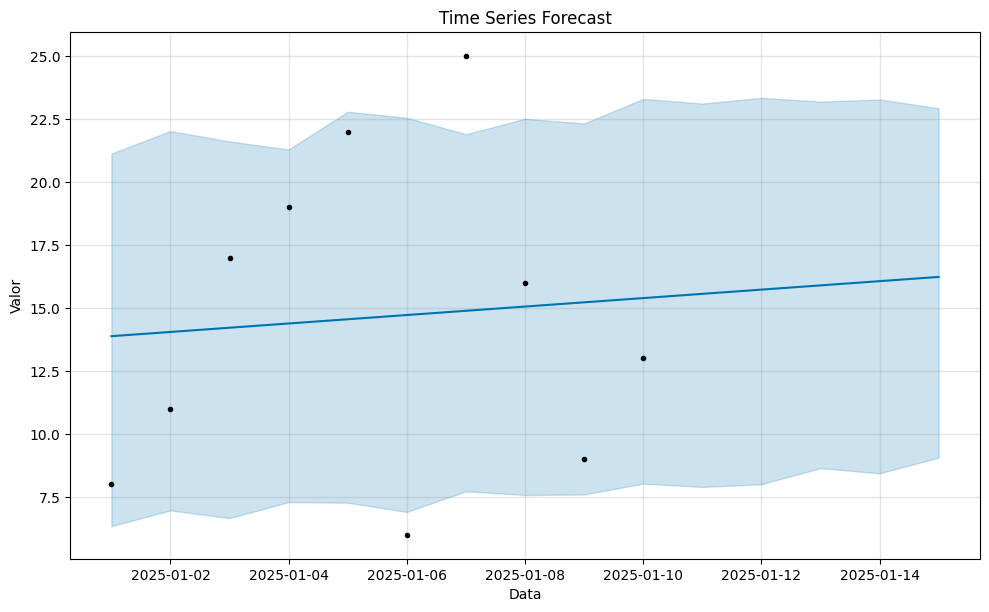

In [29]:
from prophet.plot import plot
import matplotlib.pyplot as plt  # Required for displaying the plot

# Generate the plot
fig = plot(model, forecast)
plt.title("Time Series Forecast")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.show()

In [30]:
import pandas as pd
from prophet import Prophet

# Você pode substituir por dados reais em um CSV
data = {
    'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),  # 10 dias
    'y': [10, 12, 9, 14, 13, 15, 20, 22, 18, 25]  # valores de exemplo
}
df = pd.DataFrame(data)

# Instanciar o modelo Prophet
model = Prophet()

# Treinar (fit) o modelo
model.fit(df)

# Criar dataframe futuro (n dias a frente)
future = model.make_future_dataframe(periods=5)  # 5 dias a mais
forecast = model.predict(future)

print("=== Previsão ===")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# (Opcional) Visualizar
# from prophet.plot import plot_plotly
# fig = plot_plotly(model, forecast)
# fig.show()

19:34:23 - cmdstanpy - INFO - Chain [1] start processing
19:34:23 - cmdstanpy - INFO - Chain [1] done processing


=== Previsão ===
           ds       yhat  yhat_lower  yhat_upper
0  2023-01-01   8.655275    6.009098   11.342111
1  2023-01-02  10.242839    7.459467   12.858105
2  2023-01-03  11.830403    9.479961   14.474909
3  2023-01-04  13.417967   10.799408   16.153475
4  2023-01-05  15.005531   12.196908   17.685764
5  2023-01-06  16.593094   13.930923   19.102298
6  2023-01-07  18.180658   15.440613   20.822251
7  2023-01-08  19.768222   17.061434   22.253181
8  2023-01-09  21.355786   18.701897   23.940493
9  2023-01-10  22.943350   20.294870   25.675378
10 2023-01-11  24.530914   21.940814   27.169512
11 2023-01-12  26.118478   23.455627   28.728600
12 2023-01-13  27.706042   25.180987   30.411539
13 2023-01-14  29.293606   26.828198   32.099548
14 2023-01-15  30.881169   28.257050   33.528766
